<a href="https://colab.research.google.com/github/shruthits1/my-projects/blob/main/HMDA_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_pickle("mortgage_data_balanced.pkl.gz", )

In [5]:
df.shape

(165950, 78)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165950 entries, 0 to 165949
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   as_of_year                      165950 non-null  int64  
 1   respondent_id                   165950 non-null  object 
 2   agency_name                     165950 non-null  object 
 3   agency_abbr                     165950 non-null  object 
 4   agency_code                     165950 non-null  int64  
 5   loan_type_name                  165950 non-null  object 
 6   loan_type                       165950 non-null  int64  
 7   property_type_name              165950 non-null  object 
 8   property_type                   165950 non-null  int64  
 9   loan_purpose_name               165950 non-null  object 
 10  loan_purpose                    165950 non-null  int64  
 11  owner_occupancy_name            165950 non-null  object 
 12  owner_occupancy 

In [7]:
df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2011,0000009179,Office of the Comptroller of the Currency,OCC,1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1653,5972.0,1.890000,66600.0,106.129997,1973.0,2194.0,0
1,2011,0000476810,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,31273,4188.0,4.660000,49500.0,106.169998,1331.0,3113.0,0
2,2011,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1164651,9565.0,42.529999,61200.0,100.330002,2504.0,3149.0,0
3,2011,0000030052,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,NaN,NaN,515,5928.0,9.990000,67400.0,170.520004,1755.0,2102.0,0
4,2011,0002888798,Federal Reserve System,FRS,2,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,44491,4021.0,3.560000,54200.0,139.789993,1296.0,1487.0,0


# Exploratory Data Analysis

Ethnicity vs Loan granted or not

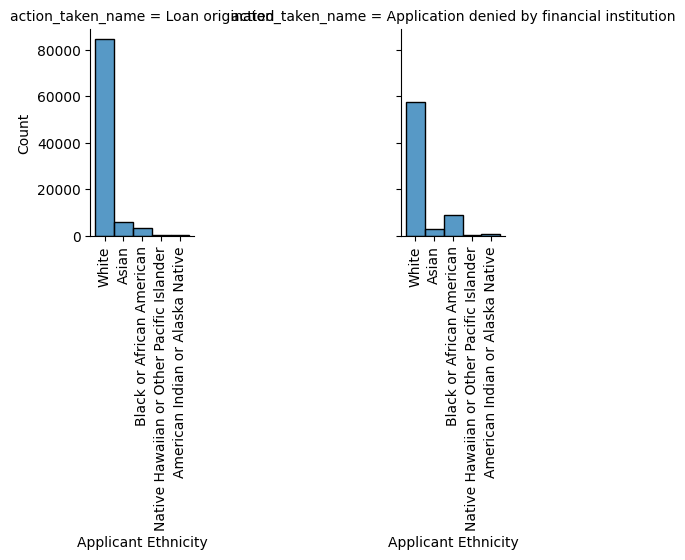

In [57]:
ax = sns.FacetGrid(col='action_taken_name', data=df)
ax.map(sns.histplot, 'applicant_race_name_1')
ax.set_xticklabels(rotation=90)
ax.set_xlabels('Applicant Ethnicity')
plt.subplots_adjust(hspace=8, wspace=2)
plt.show()

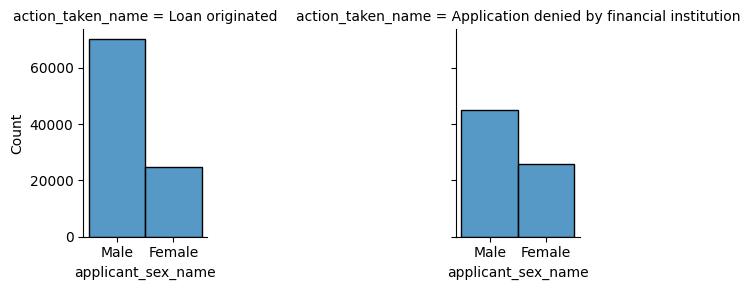

In [9]:
ax = sns.FacetGrid(col='action_taken_name', data=df)
ax.map(sns.histplot, 'applicant_sex_name')
plt.subplots_adjust(hspace=8, wspace=2)
plt.show()

Compute the frequencies of applicant_ethnicity_name, applicant_race_name_1, and applicant_sex_name columns.


In [20]:
#Compute frequency of applicant enthnicity name , applicant race name  and applicant sex name
display('Frequency of Applicants Ethnicity: ', df['applicant_ethnicity_name'].value_counts())
display('Frequency of Applicants Sex: ', df['applicant_sex_name'].value_counts())

'Frequency of Applicants Ethnicity: '

,count
applicant_ethnicity_name,
Not Hispanic or Latino,154805
Hispanic or Latino,11145


'Frequency of Applicants Sex: '

,count
applicant_sex_name,
Male,115246
Female,50704


Considering only primary race (applicant_RAce_name_1)

In [55]:
display("Applicants primary race: ", df['applicant_race_name_1'].value_counts())

'Applicants primary race: '

,count
applicant_race_name_1,
White,142230
Black or African American,12726
Asian,9119
American Indian or Alaska Native,1225
Native Hawaiian or Other Pacific Islander,650


In [56]:
df['is_multiracial'] = df[['applicant_race_2','applicant_race_3','applicant_race_4','applicant_race_5']].notna().any(axis=1)
display("Applicants with multi- race: ", df['is_multiracial'].value_counts())

'Applicants with multi- race: '

,count
is_multiracial,
False,165321
True,629
